# Unfooded Country Analysis from FAO R&D's department  

## 1. Data preprocessing

    1.1 Loading natives data with Pandas
        1.1.1 Food resources availibility's by countries by product
        1.1.2 Amout of food resources given to countries in food deficit
        1.1.3 Food insecurity describes by the number of undernurished people
        1.1.4 Population by countries
    1.2 Have a quick look to our data distributions
    1.3 How to deal with missing values

## 2. Compute data for answering to Marc's requests

    2.1 Unnourished people proportion in 2017
    2.2 Number of people which can be fooded with global food stock
    2.3 Number of people which can be fooded with vegetables
    2.4 The use of global food stock across each countries


## 3. Compute data for answering to Mélanie's requests

    3.1 Solution for request 1
    3.2 Solution for request 2
    3.3 Solution for request 3

# 1. Data preprocessing
## 1.1 Loading natives data into Python

In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

### 1.1.1 Availibility of food resources by countries by type of product

In [9]:
dispo_alim = pd.read_csv('P4OC - FAO/dispo_alimentaire.csv', header=0, sep=",")

In [10]:
dispo_alim

,Zone,Produit,Origine,Aliments pour animaux,Autres Utilisations,Disponibilité alimentaire (Kcal/personne/jour),Disponibilité alimentaire en quantité (kg/personne/an),Disponibilité de matière grasse en quantité (g/personne/jour),Disponibilité de protéines en quantité (g/personne/jour),Disponibilité intérieure,Exportations - Quantité,Importations - Quantité,Nourriture,Pertes,Production,Semences,Traitement,Variation de stock
0,Afghanistan,Abats Comestible,animale,NaN,NaN,5.0,1.72,0.20,0.77,53.0,NaN,NaN,53.0,NaN,53.0,NaN,NaN,NaN
1,Afghanistan,"Agrumes, Autres",vegetale,NaN,NaN,1.0,1.29,0.01,0.02,41.0,2.0,40.0,39.0,2.0,3.0,NaN,NaN,NaN
2,Afghanistan,Aliments pour enfants,vegetale,NaN,NaN,1.0,0.06,0.01,0.03,2.0,NaN,2.0,2.0,NaN,NaN,NaN,NaN,NaN
3,Afghanistan,Ananas,vegetale,NaN,NaN,0.0,0.00,NaN,NaN,0.0,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN
4,Afghanistan,Bananes,vegetale,NaN,NaN,4.0,2.70,0.02,0.05,82.0,NaN,82.0,82.0,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15600,Îles Salomon,Viande de Suides,animale,NaN,NaN,45.0,4.70,4.28,1.41,3.0,NaN,0.0,3.0,NaN,2.0,NaN,NaN,NaN
15601,Îles Salomon,Viande de Volailles,animale,NaN,NaN,11.0,3.34,0.69,1.14,2.0,NaN,2.0,2.0,NaN,0.0,NaN,NaN,NaN
15602,Îles Salomon,"Viande, Autre",animale,NaN,NaN,0.0,0.06,NaN,0.04,0.0,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN
15603,Îles Salomon,Vin,vegetale,NaN,NaN,0.0,0.07,NaN,NaN,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN


In [11]:
dispo_alim.isna().describe()

,Zone,Produit,Origine,Aliments pour animaux,Autres Utilisations,Disponibilité alimentaire (Kcal/personne/jour),Disponibilité alimentaire en quantité (kg/personne/an),Disponibilité de matière grasse en quantité (g/personne/jour),Disponibilité de protéines en quantité (g/personne/jour),Disponibilité intérieure,Exportations - Quantité,Importations - Quantité,Nourriture,Pertes,Production,Semences,Traitement,Variation de stock
count,15605,15605,15605,15605,15605,15605,15605,15605,15605,15605,15605,15605,15605,15605,15605,15605,15605,15605
unique,1,1,1,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2
top,False,False,False,True,True,False,False,False,False,False,False,False,False,True,False,True,True,True
freq,15605,15605,15605,12885,10109,14241,14015,11794,11561,15382,12226,14852,14015,11327,9180,13514,13313,8829


### 1.1.2 Food resources given to countries in food deficit

In [12]:
aide_alim = pd.read_csv('P4OC - FAO/aide_alimentaire.csv', header=0, sep=',')

In [13]:
aide_alim.head(10)

,Pays bénéficiaire,Année,Produit,Valeur
0,Afghanistan,2013,Autres non-céréales,682
1,Afghanistan,2014,Autres non-céréales,335
2,Afghanistan,2013,Blé et Farin,39224
3,Afghanistan,2014,Blé et Farin,15160
4,Afghanistan,2013,Céréales,40504
5,Afghanistan,2014,Céréales,15989
6,Afghanistan,2013,"Fruits secs, total",85
7,Afghanistan,2013,Huiles végétales,11087
8,Afghanistan,2014,Huiles végétales,8185
9,Afghanistan,2013,"Légumineuses Sèches,Tot.",11761


In [14]:
aide_alim.sort_values(['Pays bénéficiaire','Année'], ascending=True)

,Pays bénéficiaire,Année,Produit,Valeur
0,Afghanistan,2013,Autres non-céréales,682
2,Afghanistan,2013,Blé et Farin,39224
4,Afghanistan,2013,Céréales,40504
6,Afghanistan,2013,"Fruits secs, total",85
7,Afghanistan,2013,Huiles végétales,11087
...,...,...,...,...
372,Éthiopie,2015,Huiles végétales,1826
375,Éthiopie,2015,"Légumineuses Sèches,Tot.",10519
378,Éthiopie,2015,Mélanges et préparations,4512
381,Éthiopie,2015,Non-céréales,15151


In [15]:
aide_alim.isna().describe()

,Pays bénéficiaire,Année,Produit,Valeur
count,1475,1475,1475,1475
unique,1,1,1,1
top,False,False,False,False
freq,1475,1475,1475,1475


### 1.2.3 Food insecurity describe by the number of undernurished people

In [16]:
col_types = {'Zone' : str, 'Année' : str, 'Valeur' : int}
sous_alim = pd.read_csv('P4OC - FAO/sous_nutrition.csv', header=0, sep=',')

In [17]:
sous_alim['Valeur'].isna().describe()

count      1218
unique        2
top       False
freq        624
Name: Valeur, dtype: object

In [18]:
sous_alim.head(5)

,Zone,Année,Valeur
0,Afghanistan,2012-2014,8.6
1,Afghanistan,2013-2015,8.8
2,Afghanistan,2014-2016,8.9
3,Afghanistan,2015-2017,9.7
4,Afghanistan,2016-2018,10.5


In [19]:
sous_alim['Valeur'].isna()

0       False
1       False
2       False
3       False
4       False
        ...  
1213     True
1214     True
1215     True
1216     True
1217     True
Name: Valeur, Length: 1218, dtype: bool

### 1.2.4 Population by countries

In [20]:
pop_pays = pd.read_csv('P4OC - FAO/population.csv', header=0, sep=',')

In [21]:
pop_pays.head(5)

,Zone,Année,Valeur
0,Afghanistan,2013,32269.589
1,Afghanistan,2014,33370.794
2,Afghanistan,2015,34413.603
3,Afghanistan,2016,35383.032
4,Afghanistan,2017,36296.113


<AxesSubplot:xlabel='Zone'>

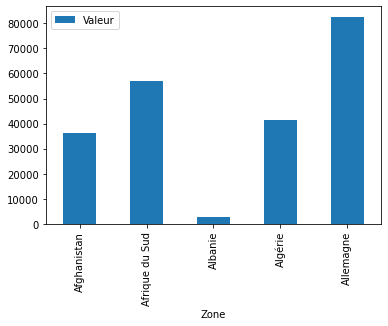

In [22]:
pop_pays[pop_pays['Année'] == 2017].set_index('Zone').head(5).plot.bar(y='Valeur')

In [23]:
pop_pays.isna().describe()

,Zone,Année,Valeur
count,1416,1416,1416
unique,1,1,1
top,False,False,False
freq,1416,1416,1416


In [61]:
pop_pays_2017_initial = pop_pays[pop_pays['Année'] == 2017][['Zone','Valeur']]
pop_pays_2017 = pop_pays[pop_pays['Année'] == 2017][['Zone','Valeur']]

## 1.3 How to deal with missing values

### 1.3.1 Food Unsecurity's data set

In [25]:
# Le nombre totale de personne en sous nutrition 
col_types = {'Zone' : str, 'Année' : str, 'Valeur' : np.float64}
sous_alim.dtypes

Zone      object
Année     object
Valeur    object
dtype: object

In [26]:
# convert string into float
def convert_string_to_float(value):
    
    if value == '<0.1':
        return 0.1
    else :
        return np.float64(value)
    

In [27]:
# proportion d'occurence '<0.1' dans Valeur 
sous_alim['Valeur'][sous_alim['Valeur'] == '<0.1'].count() / sous_alim['Valeur'].count()

0.19230769230769232

In [28]:
# Delete country with unnourished pop missing values
sous_alim['Valeur'] = pd.to_numeric(sous_alim['Valeur'], errors = 'coerce')
sous_alim.dropna(inplace = True)


In [29]:
# Replace unnourished pop's value '<0.1' by 0.1
## sous_alim['Valeur'] = sous_alim['Valeur'].apply(convert_string_to_float)
## sous_alim.dropna(inplace=True)

In [30]:
# Saving cleaning data a do a copy
sous_alim_copy = sous_alim.copy()

### 1.3.2 global food stock data

In [31]:
# Suppression des lignes entièrement nulles

dispo_alim.dropna(axis = 1, how='all') # drop des colonnes entièrement nulles
dispo_alim = dispo_alim.replace(0, np.nan).dropna(how = 'all' , subset = dispo_alim.columns[3:])
dispo_alim.replace(np.nan, 0, inplace=True) # On assume que toutes les valeurs manquantes soient nulles

In [32]:
dispo_alim.columns[3:]

Index(['Aliments pour animaux', 'Autres Utilisations',
       'Disponibilité alimentaire (Kcal/personne/jour)',
       'Disponibilité alimentaire en quantité (kg/personne/an)',
       'Disponibilité de matière grasse en quantité (g/personne/jour)',
       'Disponibilité de protéines en quantité (g/personne/jour)',
       'Disponibilité intérieure', 'Exportations - Quantité',
       'Importations - Quantité', 'Nourriture', 'Pertes', 'Production',
       'Semences', 'Traitement', 'Variation de stock'],
      dtype='object')

In [33]:
dispo_alim

,Zone,Produit,Origine,Aliments pour animaux,Autres Utilisations,Disponibilité alimentaire (Kcal/personne/jour),Disponibilité alimentaire en quantité (kg/personne/an),Disponibilité de matière grasse en quantité (g/personne/jour),Disponibilité de protéines en quantité (g/personne/jour),Disponibilité intérieure,Exportations - Quantité,Importations - Quantité,Nourriture,Pertes,Production,Semences,Traitement,Variation de stock
0,Afghanistan,Abats Comestible,animale,0.0,0.0,5.0,1.72,0.20,0.77,53.0,0.0,0.0,53.0,0.0,53.0,0.0,0.0,0.0
1,Afghanistan,"Agrumes, Autres",vegetale,0.0,0.0,1.0,1.29,0.01,0.02,41.0,2.0,40.0,39.0,2.0,3.0,0.0,0.0,0.0
2,Afghanistan,Aliments pour enfants,vegetale,0.0,0.0,1.0,0.06,0.01,0.03,2.0,0.0,2.0,2.0,0.0,0.0,0.0,0.0,0.0
4,Afghanistan,Bananes,vegetale,0.0,0.0,4.0,2.70,0.02,0.05,82.0,0.0,82.0,82.0,0.0,0.0,0.0,0.0,0.0
5,Afghanistan,"Beurre, Ghee",animale,0.0,0.0,23.0,1.17,2.61,0.03,36.0,0.0,0.0,36.0,0.0,36.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15600,Îles Salomon,Viande de Suides,animale,0.0,0.0,45.0,4.70,4.28,1.41,3.0,0.0,0.0,3.0,0.0,2.0,0.0,0.0,0.0
15601,Îles Salomon,Viande de Volailles,animale,0.0,0.0,11.0,3.34,0.69,1.14,2.0,0.0,2.0,2.0,0.0,0.0,0.0,0.0,0.0
15602,Îles Salomon,"Viande, Autre",animale,0.0,0.0,0.0,0.06,0.00,0.04,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
15603,Îles Salomon,Vin,vegetale,0.0,0.0,0.0,0.07,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


## 2.1 Unnourished people proportion in 2017

In [34]:
# La population mondiale en 2017
tot_pop = pop_pays['Valeur'][pop_pays['Année'] == 2017].sum()

In [35]:
# Population total en sous nutrition
tot_pop_sous_alim = sous_alim_copy['Valeur'][sous_alim_copy['Année'] == '2016-2018'].sum()*1000

In [36]:
tot_pop_sous_alim

535700.0

In [37]:
prop_sous_alim = tot_pop_sous_alim / tot_pop

In [38]:
prop_sous_alim

0.07097118203283073

In [39]:
size_prop_sous = [prop_sous_alim, 1-prop_sous_alim]

In [40]:
ranking_sous_alim_pays = sous_alim_copy[sous_alim_copy['Année'] == '2016-2018'][['Zone','Valeur']].sort_values(by='Valeur',ascending=False).head(10)

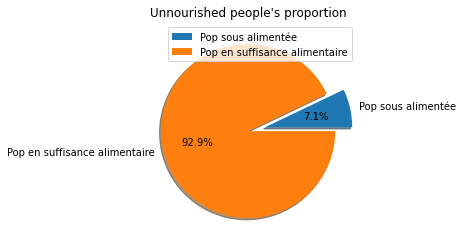

In [41]:

plt.pie(size_prop_sous, labels=['Pop sous alimentée', 'Pop en suffisance alimentaire'], explode = (0.2,0), autopct='%1.1f%%', shadow = True)
plt.legend(loc='upper right')
plt.title(label = "Unnourished people's proportion")
plt.show()

In [42]:
sous_alim_pop_total = sous_alim_copy[sous_alim_copy['Année'] == '2016-2018']['Valeur'].sum()
size = list(ranking_sous_alim_pays.Valeur/sous_alim_pop_total)
autre_country = 1 - sum(size)

In [43]:
len(size)

10

In [44]:
labels = [str(int(pos)) + '. ' + label for (pos, label) in zip (np.linspace(1,10,10),list(ranking_sous_alim_pays.Zone))]
size.insert(0, autre_country)
labels.insert(0, 'autres')

In [45]:
labels

['autres',
 '1. Inde',
 '2. Pakistan',
 '3. Indonésie',
 '4. Nigéria',
 '5. Bangladesh',
 '6. Éthiopie',
 '7. Philippines',
 '8. République-Unie de Tanzanie',
 '9. République populaire démocratique de Corée',
 '10. Kenya']

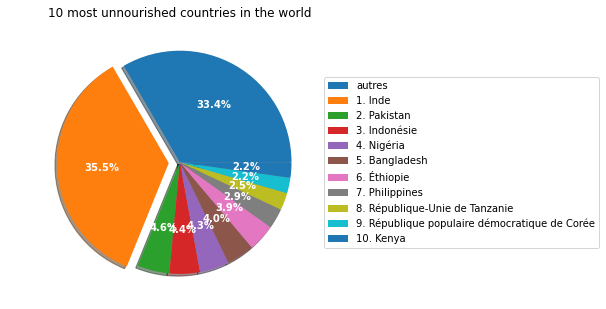

In [46]:
explode = [0 for i in range(1,12)]
explode[1] = 0.1
fig1, ax1  = plt.subplots(figsize=(5,6), subplot_kw=dict(aspect="equal"))
ax1.pie(size, labels=labels, autopct='%1.1f%%',
       shadow = True, textprops=dict(color="w", weight="bold"), explode = explode)
ax1.set_title("10 most unnourished countries in the world")
ax1.legend(labels,
        loc='center left',        
        bbox_to_anchor=(1, 0, 0.5, 1))
plt.show()


In [47]:
del size, labels

In [48]:
def func(pct, allvals):
    absolute = int(np.round(pct/100.*np.sum(allvals)))
    return "{:.1f}%\n({:d} g)".format(pct, absolute)

## 2.2 Volume of people which can be fooded with global food stock

In [62]:
dispo_alim_copy = dispo_alim.copy()

In [63]:
dispo_alim_copy.describe()

,Aliments pour animaux,Autres Utilisations,Disponibilité alimentaire (Kcal/personne/jour),Disponibilité alimentaire en quantité (kg/personne/an),Disponibilité de matière grasse en quantité (g/personne/jour),Disponibilité de protéines en quantité (g/personne/jour),Disponibilité intérieure,Exportations - Quantité,Importations - Quantité,Nourriture,Pertes,Production,Semences,Traitement,Variation de stock
count,13484.000000,13484.000000,13484.000000,13484.000000,13484.000000,13484.000000,13484.000000,13484.000000,13484.000000,13484.000000,13484.000000,13484.000000,13484.000000,13484.000000,13484.000000
mean,96.725378,64.151810,36.742955,9.062737,1.122294,1.049105,730.420795,100.278701,96.117843,361.632898,33.647137,742.337585,11.471448,163.503931,-7.742658
std,1913.796919,3241.925642,109.932409,25.036236,3.468144,3.359549,9681.060826,1003.492965,752.320985,4562.443550,628.858147,9969.682766,209.625139,4294.713597,389.832663
min,0.000000,0.000000,-21.000000,-1.930000,-0.030000,-0.370000,-3430.000000,-41.000000,-201.000000,-246.000000,0.000000,0.000000,0.000000,-19.000000,-39863.000000
25%,0.000000,0.000000,0.000000,0.090000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,5.000000,0.960000,0.040000,0.050000,12.000000,0.000000,2.000000,6.000000,0.000000,2.000000,0.000000,0.000000,0.000000
75%,0.000000,0.000000,23.000000,5.622500,0.450000,0.490000,105.000000,6.000000,22.000000,58.000000,0.000000,66.000000,0.000000,0.000000,0.000000
max,150000.000000,347309.000000,1711.000000,430.760000,60.760000,54.970000,739267.000000,42797.000000,63381.000000,426850.000000,55047.000000,739267.000000,17060.000000,326711.000000,5284.000000


In [64]:
dispo_alim_copy['Disponibilité intérieure'] = dispo_alim_copy['Disponibilité intérieure'].replace(np.nan, 0)

In [65]:
volume_dispo_global = dispo_alim_copy['Disponibilité alimentaire (Kcal/personne/jour)'].sum()

In [66]:
dispo_alim_total_pays = dispo_alim_copy[['Zone', 'Disponibilité alimentaire (Kcal/personne/jour)']].groupby('Zone').sum().reset_index()

In [67]:
1

1

In [68]:
capacite_alim_pays = dispo_alim_total_pays.join(pop_pays_2017.set_index('Zone'), 'Zone').rename({'Disponibilité alimentaire (Kcal/personne/jour)' : 'Disponibilité alimentaire totale (Kcal/personne/jour)'})

In [69]:
capacite_alim_pays['Disponibilité alimentaire totale'] = capacite_alim_pays['Disponibilité alimentaire (Kcal/personne/jour)'] * capacite_alim_pays['Valeur'] * 1000

In [70]:
# Disponibilité alimentaire mondiale en Kcal
dispo_alim_total = capacite_alim_pays['Disponibilité alimentaire totale'].sum()
# Apport journalier d'une personne adulte estimé à 2500 Kcal
nb_theorique_pers = dispo_alim_total / 2500

In [71]:
nb_theorique_pers

8367593850.9324

## 2.3 Number of people which can be fooded with vegetables

In [72]:
dispo_alim_total_pays_vege = dispo_alim[dispo_alim['Origine'] == 'vegetale'][['Zone','Disponibilité alimentaire (Kcal/personne/jour)']].groupby('Zone').sum().reset_index()

In [73]:
capacite_alim_pays_vege = dispo_alim_total_pays_vege.join(pop_pays_2017.set_index('Zone'), 'Zone')

In [74]:
capacite_alim_pays_vege

,Zone,Disponibilité alimentaire (Kcal/personne/jour),Valeur
0,Afghanistan,1871.0,36296.113
1,Afrique du Sud,2533.0,57009.756
2,Albanie,2203.0,2884.169
3,Algérie,2915.0,41389.189
4,Allemagne,2461.0,82658.409
...,...,...,...
169,Émirats arabes unis,2718.0,9487.203
170,Équateur,1732.0,16785.361
171,États-Unis d'Amérique,2698.0,325084.756
172,Éthiopie,2005.0,106399.924


In [75]:
capacite_alim_pays_vege['Disponibilité Alimentaire totale'] = capacite_alim_pays_vege['Disponibilité alimentaire (Kcal/personne/jour)'] * capacite_alim_pays_vege['Valeur'] * 1000
dispo_total_alim_vege = capacite_alim_pays_vege['Disponibilité Alimentaire totale'].sum()
nb_theorique_pers_vege = dispo_total_alim_vege / 2500

In [76]:
nb_theorique_pers_vege

6904305684.6004

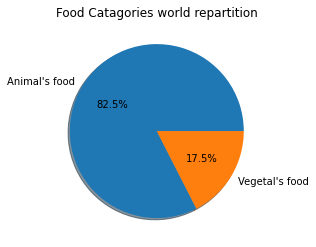

In [77]:
prop_dispo_alim_animal = (dispo_alim_total - dispo_total_alim_vege)/ dispo_alim_total
prop_dispo_alim_vege = dispo_total_alim_vege / dispo_alim_total
plt.pie([prop_dispo_alim_vege, prop_dispo_alim_animal], labels=["Animal's food","Vegetal's food"], shadow=True, autopct='%1.1f%%')
plt.title("Food Catagories world repartition")
plt.show()

In [78]:
# écrire une fonction pour scaler le résultat produit végétale et produit animale

def get_theorical_number(dispo_alim : pd.DataFrame, pop_pays : pd.DataFrame, origine='all') -> float :
        
        if origine != 'all':
            dispo_alim_pays = dispo_alim[dispo_alim['Origine'] == origine][['Zone', 'Disponibilité alimentaire (Kcal/personne/jour)']].groupby('Zone').sum()
        else :
            dispo_alim_pays = dispo_alim[['Zone', 'Disponibilité alimentaire (Kcal/personne/jour)']].groupby('Zone').sum()
        capacite_alim_pays = pop_pays.join(dispo_alim_pays, 'Zone')
        capacite_alim_pays['Disponibilité alimentaire totale'] = capacite_alim_pays['Disponibilité alimentaire (Kcal/personne/jour)'] * capacite_alim_pays['Valeur'] * 1000
        dispo_totale_alim = capacite_alim_pays['Disponibilité alimentaire totale'].sum()
        theorical_number = dispo_totale_alim / 2500
        return theorical_number

In [79]:
get_theorical_number(dispo_alim, pop_pays_2017)

8367593850.9324

## 2.4 The use of the world food stock 

In [80]:
#disp_int = aliment_animaux + autre_utilisation + alim_humaine + export - perte

In [81]:
size = dispo_alim_copy[['Aliments pour animaux', 'Autres Utilisations', 'Exportations - Quantité','Nourriture', 'Pertes']].sum()

In [82]:
dispo_alim_copy['Disponibilité intérieure'].sum()

9848994.0

In [84]:
size / dispo_alim_copy['Disponibilité intérieure'].sum()

Aliments pour animaux      0.132424
Autres Utilisations        0.087829
Exportations - Quantité    0.137289
Nourriture                 0.495102
Pertes                     0.046065
dtype: float64

In [85]:
1304245.0 / 9848994.0

0.13242418464261427

In [86]:
sum(dispo_alim_copy[['Aliments pour animaux', 'Autres Utilisations', 'Exportations - Quantité','Nourriture', 'Pertes']].sum())

8851382.0

In [87]:
aide_alim['Valeur'].sum()

11035901

In [88]:
def func(pct, allvals):
    absolute = int(np.round(pct/100. * np.sum(allvals)))
    return "{:.1f}%\n({:d} m.t)".format(pct, absolute)

In [89]:
lambda pct, allvalls : func(pct,allvals)

<function __main__.<lambda>(pct, allvalls)>

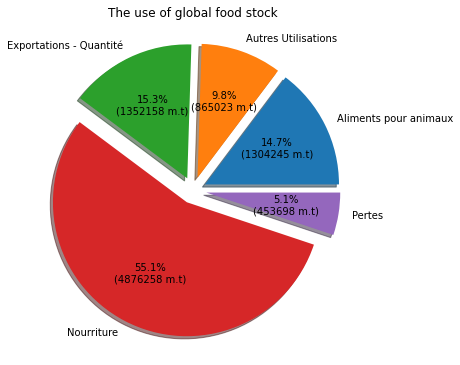

In [90]:
allvals = sum(size) - 
plt.figure(figsize=(6,10))
plt.pie(x=size / allvals,
        labels= ['Aliments pour animaux', 'Autres Utilisations', 'Exportations - Quantité','Nourriture', 'Pertes'], 
        shadow = True,
        autopct = lambda pct : func(pct,allvals),
        textprops=dict(color="black", size="10"),
        explode = [0.1,0.1,0.1,0.1,0.1]
       )
plt.title("The use of global food stock")
plt.show()

# 3. Compute data for answering to Mélanie's requests

## 3.1.1 Top of Unnourished people proportion's by Country in 2017

In [91]:
pop_pays_2017[['Zone', 'Valeur']]

,Zone,Valeur
4,Afghanistan,36296.113
10,Afrique du Sud,57009.756
16,Albanie,2884.169
22,Algérie,41389.189
28,Allemagne,82658.409
...,...,...
1390,Venezuela (République bolivarienne du),29402.484
1396,Viet Nam,94600.648
1402,Yémen,27834.819
1408,Zambie,16853.599


In [92]:
pop_pays_2017[pop_pays_2017['Zone'] == 'Dominique']

,Zone,Valeur
340,Dominique,71.458


In [93]:
sous_alim_copy = sous_alim.copy()

In [94]:
sous_alim_copy.rename(columns={'Valeur' : 'pop_sous_alim'},inplace=True)

In [95]:
sous_alim_copy

,Zone,Année,pop_sous_alim
0,Afghanistan,2012-2014,8.6
1,Afghanistan,2013-2015,8.8
2,Afghanistan,2014-2016,8.9
3,Afghanistan,2015-2017,9.7
4,Afghanistan,2016-2018,10.5
...,...,...,...
1195,Viet Nam,2013-2015,8.3
1196,Viet Nam,2014-2016,7.6
1197,Viet Nam,2015-2017,7.1
1198,Viet Nam,2016-2018,6.5


In [96]:
sous_alim_copy = sous_alim_copy[sous_alim_copy['Année'] == '2016-2018'][['Zone','pop_sous_alim']]

In [97]:
prop_pop_sous_alim = sous_alim_copy.join(pop_pays_2017.set_index('Zone'),'Zone')

In [98]:
# convertir la population sous alimentée en milliers d'hab
prop_pop_sous_alim['pop_sous_alim'] = (prop_pop_sous_alim['pop_sous_alim'] * 1000)

In [99]:
prop_pop_sous_alim.rename(columns={'Valeur' : 'pop_totale'}, inplace=True)

In [100]:
prop_pop_sous_alim['prop_pop_sous_alim'] = prop_pop_sous_alim['pop_sous_alim'] / prop_pop_sous_alim['pop_totale']

In [101]:
prop_pop_sous_alim.sort_values('prop_pop_sous_alim', ascending=False).head(12)

,Zone,pop_sous_alim,pop_totale,prop_pop_sous_alim
472,Haïti,5300.0,10982.366,0.482592
946,République populaire démocratique de Corée,12000.0,25429.825,0.471887
652,Madagascar,10500.0,25570.512,0.410629
622,Libéria,1800.0,4702.226,0.382797
604,Lesotho,800.0,2091.534,0.382494
1102,Tchad,5700.0,15016.753,0.379576
970,Rwanda,4200.0,11980.961,0.350556
730,Mozambique,9400.0,28649.018,0.328109
1120,Timor-Leste,400.0,1243.258,0.321735
4,Afghanistan,10500.0,36296.113,0.289287


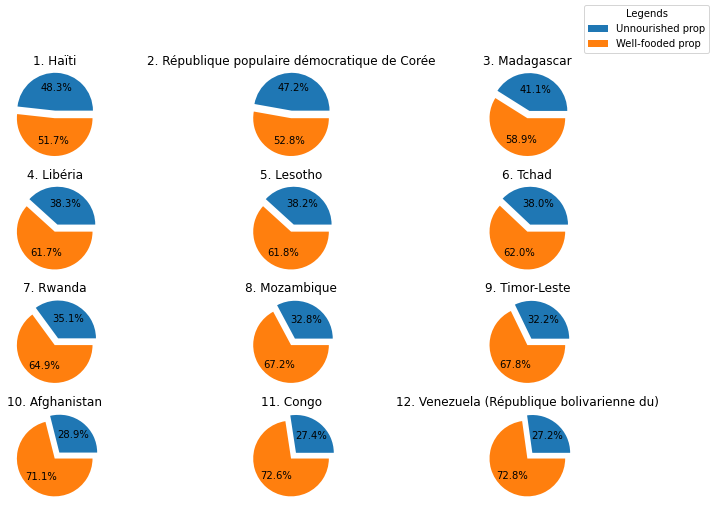

In [102]:
distribution = prop_pop_sous_alim.sort_values('prop_pop_sous_alim', ascending=False).head(12)

indexs = [(row,column) for row in range(0,4) for column in range(0,3)]

fig, axs = plt.subplots(4,3,figsize=(12,8))
axes_number = 0
for index in indexs : 
    size = distribution.iloc[axes_number].prop_pop_sous_alim
    inv_size = 1 - size
    title = distribution.iloc[axes_number].Zone
    axs[index].pie(x= [size, inv_size], explode = [0.2,0], autopct ='%1.1f%%' )
    axs[index].set_title(str(axes_number + 1) + '. '+ title)
    axes_number+=1
fig.legend(labels=['Unnourished prop','Well-fooded prop'],
          title='Legends')

## 3.2 Top 10 of  most supported food aid countries since 2013

In [84]:
aide_alim_copy = aide_alim.copy()

In [85]:
aide_alim_copy.rename(columns={'Valeur' : 'Qte Aide'}, inplace = True)
aide_alim_index = aide_alim_copy[aide_alim["Année"] >= 2013].groupby(by=['Pays bénéficiaire', 'Année']).agg({'Qte Aide' : 'sum'})


In [86]:
global_supported_df = aide_alim_index.reset_index().drop(columns=['Année']).groupby(by='Pays bénéficiaire').sum().sort_values('Qte Aide', ascending = False)
top_supported_df = global_supported_df.head(10)
other_supported_df = global_supported_df.iloc[11:,:].sum()
other_supported_df = top_supported_df.append(other_supported_df, ignore_index = True).set_index(top_supported_df.index.insert(11, "Other"))

In [87]:
top_supported_df.index.insert(11,"Other")

Index(['République arabe syrienne', 'Éthiopie', 'Yémen', 'Soudan du Sud',
       'Soudan', 'Kenya', 'Bangladesh', 'Somalie',
       'République démocratique du Congo', 'Niger', 'Other'],
      dtype='object', name='Pays bénéficiaire')

In [88]:
prop_ = top_supported_df['Qte Aide'] / top_supported_df['Qte Aide'].sum()
prop_other = other_supported_df['Qte Aide'] / other_supported_df['Qte Aide'].sum()

In [89]:
prop_

Pays bénéficiaire
République arabe syrienne           0.245557
Éthiopie                            0.182462
Yémen                               0.159371
Soudan du Sud                       0.091839
Soudan                              0.088475
Kenya                               0.073027
Bangladesh                          0.045994
Somalie                             0.038661
République démocratique du Congo    0.038110
Niger                               0.036504
Name: Qte Aide, dtype: float64

Text(0.5, 1.0, '10 most supported countries in 2017')

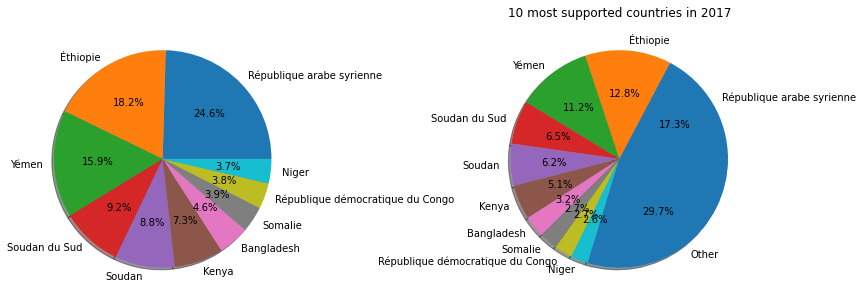

In [90]:
fig, axs = plt.subplots(1,2,figsize=(15,5))
axs[0].pie(prop_, labels=top_supported_df.index, autopct = '%1.1f%%', normalize = True, shadow=True)
axs[1].pie(prop_other, labels = other_supported_df.index, autopct = '%1.1f%%', normalize = True, shadow=True)
plt.title("10 most supported countries in 2017")

In [91]:
# Etudier la quantité d'aide en t/hab sous alimenté pour évaluer le soutient reçu du pays bénéficiaire entre 2013 et 2016

In [92]:
# Qte d'aide moyenne reçue entre 2013 et 2016 
mean_aide_alim = aide_alim_copy.groupby(by=['Pays bénéficiaire', 'Année']).sum().reset_index().groupby(by=['Pays bénéficiaire']).mean().drop(columns=['Année'])


In [93]:
mean_aide_alim

,Qte Aide
Pays bénéficiaire,
Afghanistan,92726.000000
Algérie,20278.500000
Angola,2507.000000
Bangladesh,116062.666667
Bhoutan,666.500000
...,...
Zambie,1513.000000
Zimbabwe,20856.666667
Égypte,1122.000000


In [94]:
sous_alim_copy = sous_alim.copy()

In [95]:
# Reformatter la colonne Année
lambda x : int(x.split('-')[0]) + 1
sous_alim_copy['Année'] = sous_alim_copy['Année'].apply(lambda x : int(x.split('-')[0]) + 1)

In [96]:
sous_alim_2017 = sous_alim_copy[sous_alim_copy['Année'] == 2017].rename(columns={'Zone' : 'Pays bénéficiaire'})

In [97]:
ratio_aide_pays = sous_alim_2017.join(mean_aide_alim, 'Pays bénéficiaire')

In [98]:
# Nan : Qte d'aide manquante pour le pays concerné
ratio_aide_pays

,Pays bénéficiaire,Année,Valeur,Qte Aide
4,Afghanistan,2017,10.5,92726.0
10,Afrique du Sud,2017,3.1,NaN
16,Albanie,2017,0.1,NaN
22,Algérie,2017,1.3,20278.5
40,Angola,2017,5.8,2507.0
...,...,...,...,...
1126,Togo,2017,1.6,24804.0
1156,Turkménistan,2017,0.2,NaN
1174,Ukraine,2017,1.5,NaN
1192,Venezuela (République bolivarienne du),2017,8.0,NaN


In [99]:
ratio_aide_pays.dropna(inplace=True)

In [100]:
ratio_aide_pays.rename(columns={'Valeur' : 'pop_sous_alim'}, inplace=True)

In [101]:
ratio_aide_pays['Qte Aide (kg/hab)']  = round(((ratio_aide_pays['Qte Aide']) * 1000 / (ratio_aide_pays['pop_sous_alim'] * 1000000)), 4)

In [102]:
ranking_ratio_aide_pays = ratio_aide_pays.sort_values('Qte Aide (kg/hab)', ascending = False)

In [103]:
ranking_ratio_aide_pays

,Pays bénéficiaire,Année,pop_sous_alim,Qte Aide,Qte Aide (kg/hab)
676,Mali,2017,1.0,49862.000000,49.8620
1060,Soudan,2017,5.0,223261.333333,44.6523
940,République dominicaine,2017,0.6,21126.500000,35.2108
700,Mauritanie,2017,0.5,14295.500000,28.5910
760,Nicaragua,2017,1.1,28833.000000,26.2118
370,Éthiopie,2017,21.1,460431.333333,21.8214
1012,Sénégal,2017,1.5,29920.666667,19.9471
22,Algérie,2017,1.3,20278.500000,15.5988
1126,Togo,2017,1.6,24804.000000,15.5025
580,Kenya,2017,11.9,184278.666667,15.4856


## 3.3 Food Capacity 

In [570]:
# Etudier l'impact des aides sur la quantité disponible par habitant dans les pays les plus déficitaires.
# Objectif : Prioriser les aides pour les pays les plus déficitaires 

In [571]:
# Les pays avec le plus de disponibilité par hab pour 

In [127]:
dispo_alim_copy = dispo_alim.copy()
pop_pays_2017 = pop_pays_2017_initial.copy()

In [142]:
# Colonne flux et colonne utilisation

dispo_alim_copy['Disponibilité intérieur calculée 1'] = dispo_alim['Importations - Quantité'] + dispo_alim['Production'] + dispo_alim['Exportations - Quantité']
dispo_alim_copy['Disponibilité intérieur calculée 2'] = dispo_alim['Nourriture'] + dispo_alim['Autres Utilisations']  + dispo_alim['Exportations - Quantité'] + dispo_alim['Aliments pour animaux']

In [144]:
dispo_alim_copy['Disponibilité intérieur calculée 1']

Zone
Afghanistan                       NaN
Afrique du Sud                    NaN
Albanie                           NaN
Algérie                           NaN
Allemagne                         NaN
Angola                            NaN
Antigua-et-Barbuda                NaN
Arabie saoudite                   NaN
Argentine                         NaN
Arménie                           NaN
Australie                         NaN
Autriche                          NaN
Azerbaïdjan                       NaN
Bahamas                           NaN
Bangladesh                        NaN
Barbade                           NaN
Belgique                          NaN
Belize                            NaN
Bermudes                          NaN
Bolivie (État plurinational de)   NaN
Name: Disponibilité intérieur calculée 1, dtype: float64

<AxesSubplot:>

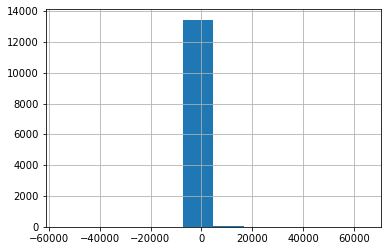

In [129]:
(dispo_alim_copy['Disponibilité intérieur calculée 1'] - dispo_alim_copy['Disponibilité intérieure']).hist()

<AxesSubplot:>

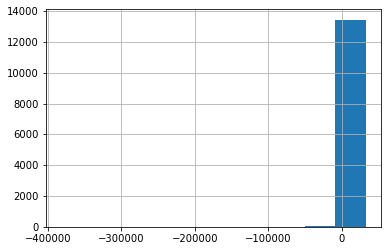

In [130]:
(dispo_alim_copy['Disponibilité intérieur calculée 2'] - dispo_alim_copy['Disponibilité intérieure']).hist()

In [131]:
dispo_alim_copy = dispo_alim_copy.groupby(by=['Zone']).sum()[['Disponibilité alimentaire (Kcal/personne/jour)']]
pop_pays_2017_index = pop_pays_2017.set_index('Zone')

In [132]:
dispo_alim_copy

,Disponibilité alimentaire (Kcal/personne/jour)
Zone,
Afghanistan,2087.0
Afrique du Sud,3020.0
Albanie,3188.0
Algérie,3293.0
Allemagne,3503.0
...,...
Émirats arabes unis,3275.0
Équateur,2346.0
États-Unis d'Amérique,3682.0


In [133]:
pop_pays_2017.set_index('Zone')

,Valeur
Zone,
Afghanistan,36296.113
Afrique du Sud,57009.756
Albanie,2884.169
Algérie,41389.189
Allemagne,82658.409
...,...
Venezuela (République bolivarienne du),29402.484
Viet Nam,94600.648
Yémen,27834.819


In [134]:
dispo_alim_copy.loc['France']

Disponibilité alimentaire (Kcal/personne/jour)    3482.0
Name: France, dtype: float64

In [135]:
dispo_int_pop = pd.concat([dispo_alim_copy, pop_pays_2017_index], axis = 1)

In [136]:
dispo_int_pop.loc['France']

Disponibilité alimentaire (Kcal/personne/jour)     3482.000
Valeur                                            64842.509
Name: France, dtype: float64

In [137]:
dispo_int_pop['Dispo / hab'] = dispo_int_pop['Disponibilité alimentaire (Kcal/personne/jour)']

In [138]:
dispo_int_pop.reset_index(inplace=True)

In [140]:
dispo_int_pop.sort_values('Disponibilité alimentaire (Kcal/personne/jour)', ascending = True)

,Zone,Disponibilité alimentaire (Kcal/personne/jour),Valeur,Dispo / hab
128,République centrafricaine,1879.0,4596.023,0.149224
166,Zambie,1924.0,16853.599,0.041668
91,Madagascar,2056.0,25570.512,0.029348
0,Afghanistan,2087.0,36296.113,0.020987
65,Haïti,2089.0,10982.366,0.069428
...,...,...,...,...
233,Soudan du Sud,NaN,10910.763,NaN
234,Tchéquie,NaN,10641.034,NaN
235,Tokélaou,NaN,1.300,NaN
236,Tonga,NaN,101.998,NaN


In [658]:
pays_riche_alim = dispo_int_pop.sort_values('Dispo / hab',ascending = False).head(15)
pays_pauvre_alim = dispo_int_pop.sort_values('Dispo / hab',ascending = True).head(15)

In [659]:
pays_riche_alim

,Zone,Disponibilité intérieure,Valeur,Dispo / hab
50,Eswatini,6467.0,1124.805,5.749441
23,Brésil,1033314.0,207833.823,4.971828
63,Guyana,3290.0,775.222,4.243946
17,Belize,1542.0,375.769,4.103585
98,Maurice,4767.0,1264.499,3.769872
44,Danemark,19749.0,5732.274,3.445230
26,Bélarus,27522.0,9450.231,2.912310
51,Fidji,2499.0,877.459,2.847996
10,Australie,66992.0,24584.620,2.724956
88,Lituanie,7467.0,2845.414,2.624223


In [660]:
pays_pauvre_alim


,Zone,Disponibilité intérieure,Valeur,Dispo / hab
165,Yémen,9782.0,27834.819,0.351430
151,Tchad,5304.0,15016.753,0.353206
154,Timor-Leste,447.0,1243.258,0.359539
0,Afghanistan,13515.0,36296.113,0.372354
172,Éthiopie,44014.0,106399.924,0.413666
56,Gambie,940.0,2213.889,0.424592
87,Libéria,2002.0,4702.226,0.425756
62,Guinée-Bissau,786.0,1828.145,0.429944
14,Bangladesh,72757.0,159685.424,0.455627
84,Lesotho,966.0,2091.534,0.461862


In [661]:
# Quantité nécessaire en nutriment pour une alimentation équilibrée et un apport de 2500Kcal
# 15 % proteine --> 375 Kcal / 4
# 40 % lipide --> 1000 Kcal / 9 
# 45 % glucide --> 1125 Kcal / 4

In [662]:
apport_kg = sum([375/4 , 1000/9, 1125/4])

In [663]:
apport_kg

486.1111111111111

In [664]:
def func_kcal(pct):
    absolute = int(np.round(pct/100. * 2500))
    return "{:.1f}%\n({:d} Kcal)".format(pct, absolute)

In [665]:
def func_g(pct):
    absolute = int(np.round(pct/100. * apport_kg))
    return "{:.1f}%\n({:d} g)".format(pct, absolute)

Text(0.5, 0.98, "nutriment-adult's proportion recommanded")

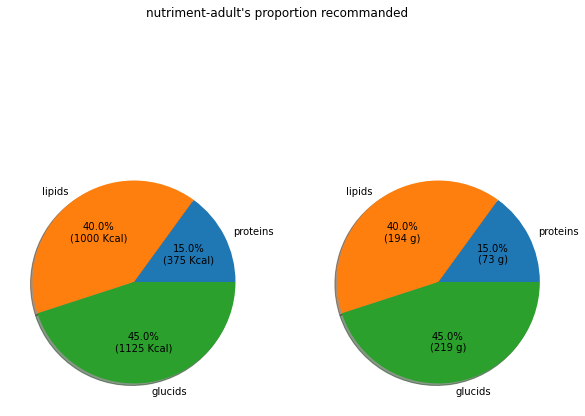

In [666]:
fig, axs = plt.subplots(1,2,figsize=(10,8))
axs[0].pie(x=[0.15, 0.40, 0.45], labels = ['proteins', 'lipids', 'glucids'], shadow = True, autopct = lambda pct : func_kcal(pct))
axs[1].pie(x=[0.15, 0.40, 0.45], labels = ['proteins', 'lipids', 'glucids'], shadow = True, autopct = lambda pct : func_g(pct))
fig.suptitle("nutriment-adult's proportion recommanded")

In [667]:
#Portion alimentaire est d'1kg par jour et par personne
seuil_thoerique_an = 356

In [668]:
dispo_alim_copy = dispo_alim.copy()
dispo_alim_pays = pd.DataFrame(dispo_alim_copy.groupby(by='Zone').sum()['Nourriture'])
pop_pays_2017.set_index('Zone', inplace=True)
couver_alimentaire_pays = pd.concat([dispo_alim_pays, pop_pays_2017], axis = 1)

In [669]:
couver_alimentaire_pays['couverture alimentaire (kg / hab)'] = (couver_alimentaire_pays['Nourriture']*1000) / (couver_alimentaire_pays['Valeur'] *365)

In [670]:
couver_alimentaire_pays.dropna(inplace=True)

In [671]:
couver_alimentaire_pays.loc['Mali']

Nourriture                            7867.000000
Valeur                               18512.430000
couverture alimentaire (kg / hab)        1.164268
Name: Mali, dtype: float64

In [672]:
couver_alimentaire_pays.sort_values('couverture alimentaire (kg / hab)', ascending = False)

,Nourriture,Valeur,couverture alimentaire (kg / hab)
Zone,,,
Albanie,3476.0,2884.169,3.301917
Monténégro,752.0,627.563,3.282976
Grèce,11919.0,10569.450,3.089545
Irlande,5320.0,4753.279,3.066376
Lituanie,3169.0,2845.414,3.051293
...,...,...,...
Gambie,701.0,2213.889,0.867500
Éthiopie,33361.0,106399.924,0.859023
Zambie,5088.0,16853.599,0.827107


In [673]:
couver_alimentaire_pays.reset_index(inplace = True)

In [674]:
nb_pays_sup_seuil = pd.DataFrame((couver_alimentaire_pays['couverture alimentaire (kg / hab)'] > 1.)).describe().loc['freq']
nb_total_pays = len(couver_alimentaire_pays)
nb_pays_inf_seuil =  nb_total_pays - nb_pays_sup_seuil
x = list(nb_pays_sup_seuil/nb_total_pays) + list(nb_pays_inf_seuil/nb_total_pays)

In [679]:
serie_categorise = pd.cut(couver_alimentaire_pays['couverture alimentaire (kg / hab)'], bins = [0,1,1.5,2,3,10], labels = ['very poor', 'poor', 'sufficient', 'rich','very rich'])

couver_alimentaire_pays.groupby(serie_categorise)['Zone'].count() / couver_alimentaire_pays.groupby(serie_categorise)['Zone'].count().sum()
prop_rich_alim_pays = couver_alimentaire_pays.groupby(serie_categorise)['Zone'].count() / couver_alimentaire_pays.groupby(serie_categorise)['Zone'].count().sum()


([<matplotlib.patches.Wedge at 0x1dfe91c4310>,
 [Text(1.0736834627076814, 0.2391732048287244, 'very poor'),
  Text(0.33609474744700385, 1.047396926068878, 'poor'),
  Text(-1.09541601480365, 0.10031826609192221, 'sufficient'),
  Text(0.3551685109863935, -1.0410837280467446, 'rich'),
  Text(1.0934010833731267, -0.12030823279590247, 'very rich')],
 [Text(0.5856455251132807, 0.13045811172475874, '7.0%'),
  Text(0.18332440769836572, 0.571307414219388, '26.2%'),
  Text(-0.5974996444383546, 0.05471905423195756, '30.8%'),
  Text(0.193728278719851, -0.5678638516618606, '32.6%'),
  Text(0.5964005909307962, -0.06562267243412861, '3.5%')])

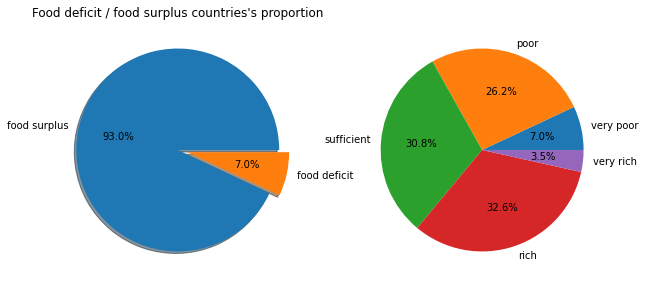

In [682]:
fig, axe = plt.subplots(1,2, figsize=(10,6))
axe[0].pie(x, labels=['food surplus', 'food deficit'], shadow=True, explode=[0,0.1], autopct = '%1.1f%%')
axe[0].set_title("Food deficit / food surplus countries's proportion")
axe[1].pie(prop_rich_alim_pays, labels =['very poor', 'poor', 'sufficient', 'rich','very rich'], autopct = '%1.1f%%')